# Sentiment Analysis

In [1]:
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from emoji import UNICODE_EMOJI
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from textblob import Word

import warnings
warnings.filterwarnings("ignore")

Viene importato il dataset per effettuare l'analisi

In [2]:
df=pd.read_csv('eng_comments.csv')

In [3]:
df.head(2)

,Unnamed: 0,comment,comment_id,author_url,author_name,reply_count,like_count,date,vidid,total_reply_counts,vid_title,just_date
0,0,What is the average salary?,UgxQ1EqJ4CyNODDVbGh4AaABAg,http://www.youtube.com/channel/UCv8KHbiZB_8XCB...,R,0,0,2022-01-20 10:13:03+00:00,fmLPS6FBbac,0,Become a DATA ANALYST with NO degree?!? The Go...,2022-01-20
1,1,Hi. What do you recommend For stata ana spss? ...,UgzrOyzgK26L2aqZ3xN4AaABAg,http://www.youtube.com/channel/UCG0CKDnotgl_L1...,Cristina Acuña,0,0,2022-01-20 05:29:58+00:00,U4vh2EClJic,0,DON'T get a Mac for Data Science?? - MacOS Vs....,2022-01-20


Vengono rimossi i commenti effettuati dallo stesso proprietario del canale, in quanto potrebbero inficiare l'analisi

In [4]:
# remove self comments 
df = df.query('author_name != "Luke Barousse" ')

## Vader Sentiments

Utilizza un elenco di caratteristiche lessicali che sono etichettate come positive o negative in base al loro orientamento semantico per calcolare il sentimento del testo. L'analisi Vader restituisce la probabilità che una data frase sia positiva, negativa e neutra.

In [5]:
sentiment = SentimentIntensityAnalyzer()
sentiment.polarity_scores(df.comment[0])

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [6]:
df['compound'] = [sentiment.polarity_scores(x)['compound'] for x in df['comment']]
df['neg'] = [sentiment.polarity_scores(x)['neg'] for x in df['comment']]
df['neu'] = [sentiment.polarity_scores(x)['neu'] for x in df['comment']]
df['pos'] = [sentiment.polarity_scores(x)['pos'] for x in df['comment']]

In [7]:
vader=df[['comment','compound','neg','neu','pos']]
vader.head()

,comment,compound,neg,neu,pos
0,What is the average salary?,0.0000,0.000,1.000,0.000
1,Hi. What do you recommend For stata ana spss? ...,0.4329,0.000,0.840,0.160
2,"to talk about my self , i started university w...",0.8791,0.062,0.788,0.150
3,#1 skill is learning how to identify what the ...,0.0772,0.000,0.942,0.058
4,Buying an exorbitantly priced Mac to end up ru...,-0.3883,0.107,0.843,0.050


Commenti migliori

In [8]:
df.sort_values(by=['compound'], ascending=False)[['comment']].head(10)

,comment
3296,"I've not used Tableau, but for Power BI, I thi..."
2993,"excel is a great tool, but it must be handled ..."
3129,Thanks ♥️♥️♥️💕💕 lots of love 💕💕♥️♥️♥️🙏 Jai Jin...
2673,Loved the video my Dude 🍺🤜🤛🦋🙅\n\nI have been l...
2578,Good case example. We use Tableau to mine our ...
2894,"I must say, THIS IS POWERFUL, LUKE! This remin..."
4700,Hi buddy :) I am I have found your channel . I...
700,Great video analysis; thanks! But I would add ...
3116,"Hi Luke, your amazing tutorials have made my d..."
3348,Just subscribed your channel.. not bcz of the ...


Commenti peggiori

In [9]:
df.sort_values(by=['compound'], ascending=True)[['comment']].head(10)

,comment
3478,"Beloved, Please give this your special attenti..."
2417,Hey Luke.\n\nI … I’ve been up and down with my...
197,Great video Luke as always!! thank you for sha...
1560,"Stellar Vid. I got a lot of anxiety thinking ""..."
3837,The career outcomes from Coursera are really b...
3619,screw windows.. would rather have linux runnin...
2833,I ve finished postgresql course in udemy and s...
4334,Basically you’re saying that we have plenty of...
1090,Man I am pursuing data science as a career and...
2948,I hope we do not need to program using python....


## Textblob Sentiments
TextBlob è una libreria Python per Natural Language Processing (NLP), che supporta analisi e operazioni complesse su dati testuali.
Dopo aver assegnato punteggi individuali a tutte le parole, il sentiment finale viene calcolato da operazioni di pooling come l’utilizzo di una media di tutti i sentimenti.
TextBlob restituisce la polarità e la soggettività di una frase. 
La polarità è compresa tra [-1,1], -1 definisce un sentimento negativo e 1 definisce un sentimento positivo.

In [10]:
df['textblob_polarity'] = df['comment'].map(lambda text: TextBlob(text).sentiment.polarity)
df['comment_len'] = df['comment'].astype(str).apply(len)
df['word_count'] = df['comment'].apply(lambda x: len(str(x).split()))

Commenti positivi

In [11]:
df.sort_values(by=['textblob_polarity'], ascending=False)[['comment', 'textblob_polarity']].head(10)

,comment,textblob_polarity
1344,"""Experiencal work"" awesome",1.0
2609,Awesome video. I just started the course,1.0
171,9:07 In my role of procurement....... is this ...,1.0
1553,Superb advice 😎,1.0
1147,Great insight from everyone!,1.0
2506,Best Guide on the internet. Thank You!,1.0
4160,Can i run 3D games on any of these options? wh...,1.0
568,What I was looking for. Perfect. You got a sub.,1.0
4147,Finishing my capstone for IBM cert now :D,1.0
4131,The problem Is not with certification the Prob...,1.0


Commenti Negativi

In [12]:
df.sort_values(by=['textblob_polarity'], ascending=True)[['comment', 'textblob_polarity']].head(10)

,comment,textblob_polarity
944,This google Courses are horrible. Their are ju...,-1.000000
2982,The worst are the ones that use them as To-Do-...,-1.000000
3113,I duno why it was shocking for you. Even today...,-1.000000
4879,Sick setup!,-0.892857
2826,Those muscle ups on rings are brutal 👌,-0.875000
3744,"I hate when people say ""I digress""",-0.800000
3787,I fucking hate python,-0.800000
2698,How did you move all that data from Excel to S...,-0.800000
3868,"Regardless of which one, truly annoying is tho...",-0.800000
1130,Does anyone know if Apple is coming out with 1...,-0.800000


## Analisi esplorativa
L'analisi esplorativa dei dati viene utilizzata per analizzare le due diverse sentiment e riepilogarne gli andamenti.

Nella prima esplorazione si sovrappongono l’indice di polarità di TextBlob e l’indice compound effettuato tramite Vader. Essendo entrambi compresi in un range [-1,+1], sono confrontabili e riportabili in un grafico con assi uguali tra loro.


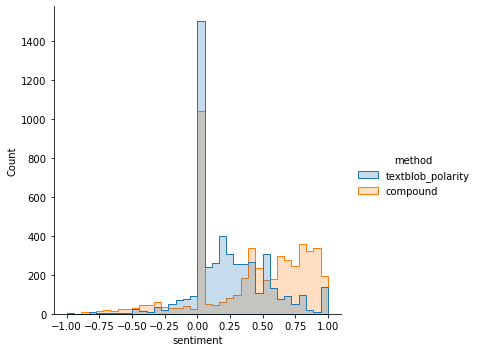

In [13]:
# comparison of textblob and vader sentiment distribution
sub = df[['comment', 'textblob_polarity', 'compound', 'just_date', 'vidid', 'comment_len', 'word_count']]
pol_hist = sub.melt(id_vars=['comment', 'just_date', 'vidid', 'comment_len', 'word_count'], value_vars=['textblob_polarity', 'compound'], var_name='method', value_name='sentiment')
sns.displot(pol_hist, x="sentiment",hue="method", element="step")

Nella seconda esplorazione vengono riportati i video in ordine decrescente di sentiment (Vader)

In [14]:
# videos with highest and lowest sentiments 
df.groupby('vid_title').mean()[['compound']].sort_values(by=['compound'], ascending=False)

,compound
vid_title,
Dimensions Vs Measures (Blue Vs Green Data) - Tableau Tutorial P.3,0.842350
Python Functions for Data Science / Data Analysis - P.5,0.838717
M1 vs Intel Mac for Python #shorts,0.830200
Create Stacked Bar Chart (and any other visuals EASILY!) w/ Show Me! - Tableau Tutorial P.4,0.808750
Parameters (Create & Use in Calculated Fields and/or Visuals) - Tableau Tutorial P.7,0.768333
...,...
Install VS Code with Python for Data Science / Data Analysis - P.3,0.331717
Python for M1 Mac vs Intel (SPOILER: M1 is 2x faster),0.323996
Become a DATA ANALYST with NO degree?!? The Google Data Analytics Professional Certificate,0.308248


Nell'ultima analisi esplorativa proposta si evidenzia l’andamento nel tempo dell’indice compound della libreria Vader e l’indice di polarità della libreria TextBlob

<AxesSubplot:xlabel='just_date', ylabel='sentiment'>

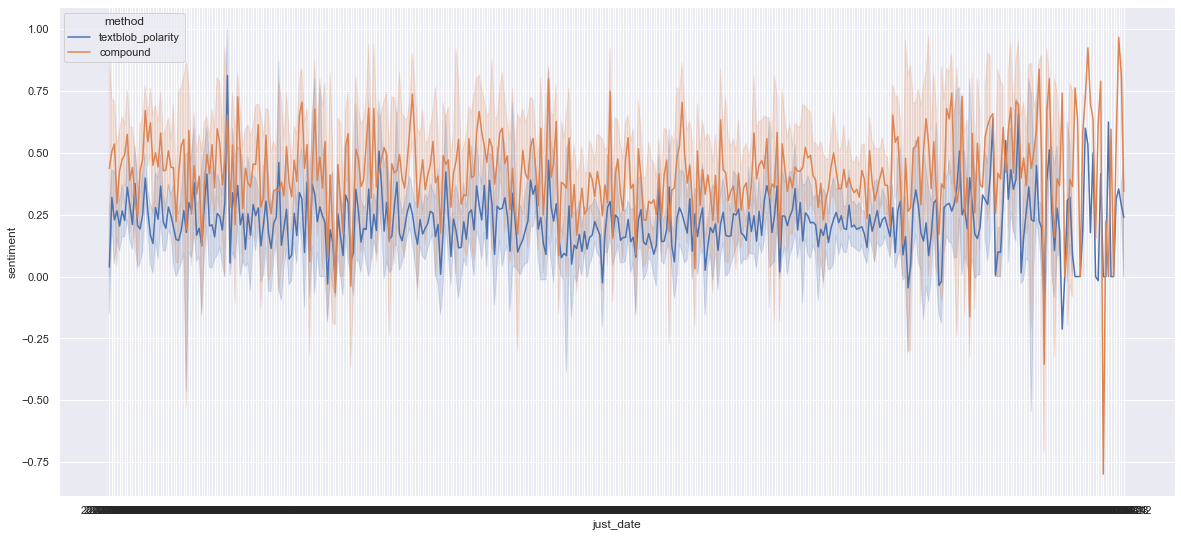

In [15]:
# sentiments over time 
sns.set(rc={'figure.figsize':(20,9)})
sns.lineplot(x="just_date", y="sentiment", hue="method", data=pol_hist) 

## Emotion Analysis
L'Emotion Analysis è il processo di identificazione e analisi delle emozioni celate e nascoste espresse nei dati testuali.

In [16]:
from nrclex import NRCLex
text_object = NRCLex('you are an intelligent and beautiful girl')
text_object.raw_emotion_scores

{'positive': 2, 'trust': 1, 'joy': 1}

In [17]:
def get_emotions(sentence):
  text_object = NRCLex(sentence)
  return text_object.raw_emotion_scores

In [18]:
df['emotion'] = df.comment.apply(get_emotions)
df[['emotion', 'comment']].head(5)

,emotion,comment
0,"{'anticipation': 1, 'joy': 1, 'positive': 1, '...",What is the average salary?
1,"{'positive': 3, 'trust': 2, 'anticipation': 1}",Hi. What do you recommend For stata ana spss? ...
2,"{'positive': 14, 'anticipation': 8, 'trust': 1...","to talk about my self , i started university w..."
3,"{'positive': 2, 'anticipation': 1}",#1 skill is learning how to identify what the ...
4,"{'positive': 7, 'joy': 4, 'trust': 5, 'anticip...",Buying an exorbitantly priced Mac to end up ru...
